In [1]:
import pandas as pd

In [2]:
train_file = 'Original_Data/train.csv'
test_file = 'Original_Data/test.csv'
trainset = pd.read_csv(train_file)
testset = pd.read_csv(test_file)

In [3]:
trainset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Missing values

In [4]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
testset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
trainset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

# Count the cabin number for each passenger and put it in a new column named Cabin_Counts

In [7]:
def get_Cabin_Counts(cabin):
    return len(cabin.split(' '))

In [8]:
trainset['Cabin_Counts'] = trainset['Cabin'].apply(lambda x: 0 if type(x) == float else get_Cabin_Counts(x))
testset['Cabin_Counts'] = testset['Cabin'].apply(lambda x: 0 if type(x) == float else get_Cabin_Counts(x))

In [9]:
trainset = trainset.drop('Cabin', axis=1)
testset = testset.drop('Cabin', axis=1)

In [10]:
trainset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Counts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


# Mean Imputation to deal with missing values

In [13]:
from sklearn.preprocessing import Imputer
import numpy as np
def mean_impute(data):
    data = data.values.reshape(len(data),1)
    imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imr = imr.fit(data)
    imputed_data = imr.transform(data)
    imputed_data = np.reshape(imputed_data, (len(data), -1))
    return imputed_data

## Imupte Age column

In [14]:
trainset['Age'] = mean_impute(trainset['Age'])
testset['Age'] = mean_impute(testset['Age'])

In [16]:
trainset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Counts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [20]:
testset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Counts
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


## Impute Fare column for test set

In [27]:
testset['Fare'] = mean_impute(testset['Fare'])

# Handling Categorical data for Embarked column

Since there is only two empty values for the Embarked column in training set, we will fill those with most frequently value.

In [30]:
data = trainset['Embarked']
data = data.tolist()

In [31]:
for val in trainset['Embarked'].unique():
    if not type(val) == float:
        print(val + " : " + str(data.count(val)))

S : 646
C : 168
Q : 77


Now we know that "S" is the most frequent value. Then we will set the two empty places with "S".

In [32]:
trainset['Embarked'].shape

(891,)

In [33]:
trainset['Embarked'] = trainset['Embarked'].fillna('S')

In [34]:
trainset['Embarked'].isnull().sum()

0

Performing one-hot encoding for the Embarked coloumn.

In [35]:
data = pd.get_dummies(trainset[['Embarked']])
data.head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
trainset = pd.concat([trainset, data], axis=1)

In [37]:
trainset = trainset.drop('Embarked', axis=1)

In [38]:
trainset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,0,1


In [26]:
data = pd.get_dummies(testset[['Embarked']])
testset = pd.concat([testset, data], axis=1)
testset = testset.drop('Embarked', axis=1)
testset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,0,0,1


## Verify that we don't have empty values now

In [39]:
trainset.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin_Counts    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [40]:
testset.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin_Counts    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

# Mapping Sex column

In [41]:
sex_mapping = {
    'male' : 1,
    'female' : 0
}
trainset['Sex'] = trainset['Sex'].map(sex_mapping)
testset['Sex'] = testset['Sex'].map(sex_mapping)

In [42]:
trainset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,0,1


In [43]:
testset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,0,1


# Create new feature Title from Name

In [50]:
import re
def extract_title(name):
    return re.search(', (.*?)\.', name).group(1)

In [52]:
trainset['Title'] = trainset['Name'].apply(lambda x: extract_title(x))
testset['Title'] = testset['Name'].apply(lambda x: extract_title(x))

In [58]:
trainset.groupby('Title').size()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

In [59]:
testset.groupby('Title').size()

Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64

## Group the rare titles into a new 'Minor' category

In [63]:
trainset['Title'] = trainset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir', 'the Countess'], 'Minor')
testset['Title'] = testset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir', 'the Countess'], 'Minor')

In [64]:
trainset.groupby('Title').size()

Title
Master     40
Minor      27
Miss      182
Mr        517
Mrs       125
dtype: int64

In [65]:
testset.groupby('Title').size()

Title
Master     21
Minor       7
Miss       78
Mr        240
Mrs        72
dtype: int64

## Mapping the title

In [66]:
title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Minor': 5
}
trainset['Title'] = trainset['Title'].map(title_mapping)
testset['Title'] = testset['Title'].map(title_mapping)

In [67]:
trainset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,0,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,0,1,1


# Drop unuseful features

In [68]:
drop_list = ['PassengerId', 'Name', 'Ticket']
trainset = trainset.drop(drop_list, axis=1)
testset = testset.drop(drop_list, axis=1)
trainset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0,3
2,1,3,0,26.0,0,0,7.9250,0,0,0,1,2
3,1,1,0,35.0,1,0,53.1000,1,0,0,1,3
4,0,3,1,35.0,0,0,8.0500,0,0,0,1,1


# Let's plot the correlation for each feature

In [69]:
corr = trainset.corr()

## Use heatmap to see the correlations between features

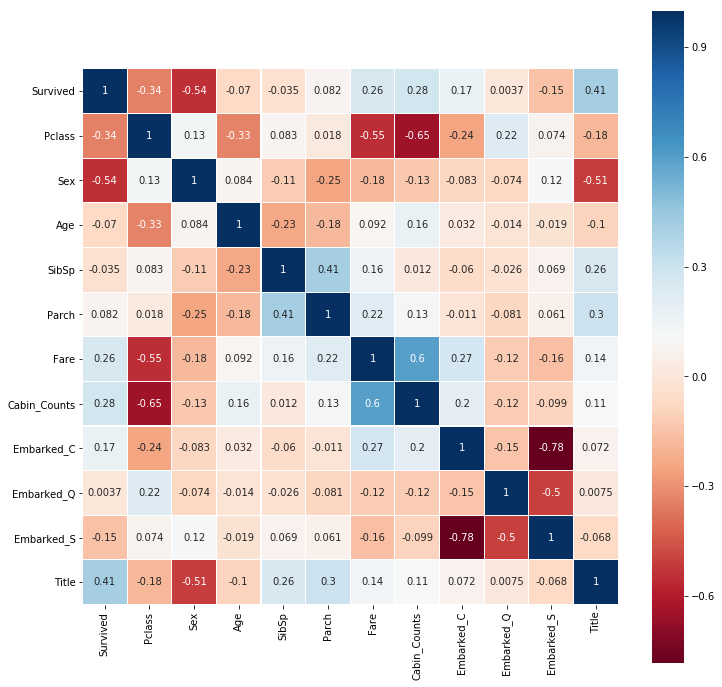

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 12))
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

## Use horizontal bar plot to see how the festures are related to the target

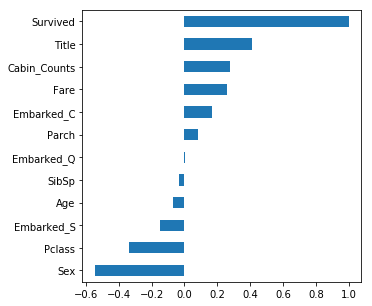

In [71]:
target_corr = corr['Survived'].sort_values()
target_corr.plot.barh(figsize=(5, 5))
plt.show()

# Let's see if feature scaling helps

In [86]:
from sklearn.preprocessing import StandardScaler
def standarize_set(dataset):
    X = dataset.drop('Survived', axis=1)
    stdsc = StandardScaler()
    X_std = stdsc.fit_transform(X)
    data_std = pd.DataFrame(data=X_std, columns=X.columns.values)
    data_std['Survived'] = dataset['Survived']
    return data_std
train_std = standarize_set(trainset)

In [87]:
train_std.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Counts,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.488483,-0.482043,-0.307562,0.615838,-0.704470,0
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,1.340249,2.074505,-0.307562,-1.623803,1.197599,1
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.488483,-0.482043,-0.307562,0.615838,0.246564,1
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,1.340249,-0.482043,-0.307562,0.615838,1.197599,1
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.488483,-0.482043,-0.307562,0.615838,-0.704470,0


In [89]:
corr_std = train_std.corr()

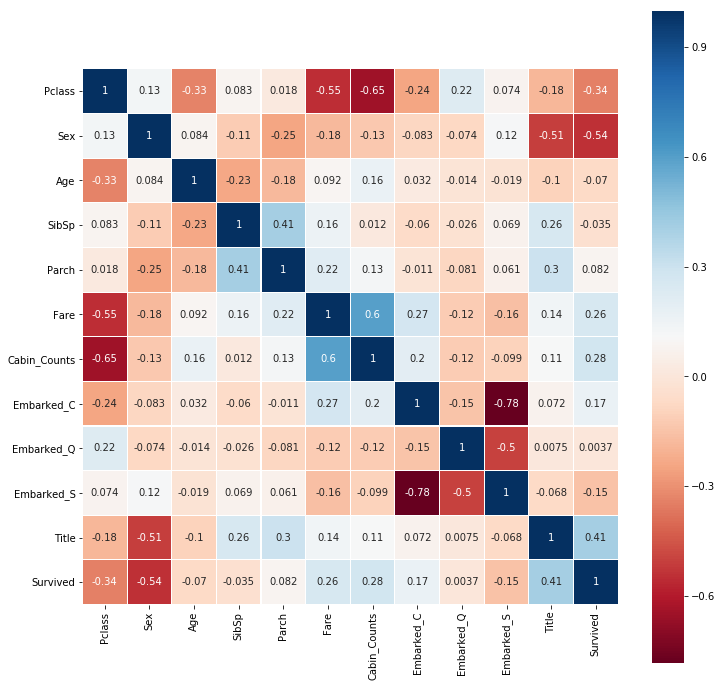

In [90]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 12))
sns.heatmap(corr_std, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

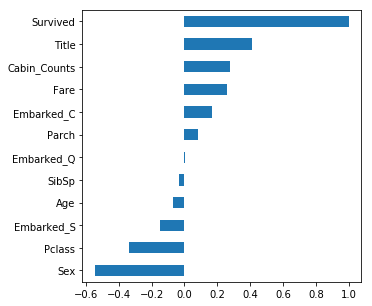

In [91]:
target_corr = corr_std['Survived'].sort_values()
target_corr.plot.barh(figsize=(5, 5))
plt.show()

### Feature scaling doesn't help a lot. No need to do that.

# Now we have the final all data after feature engineering. Save it!

In [93]:
import pickle
outputfile = "Dataset/All_Data.pkl"
with open(outputfile, "wb") as f:
    pickle.dump(trainset, f, pickle.HIGHEST_PROTOCOL)